# Fitness Classes Data Cleaning and Preprocessing Notebook

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load Data

In [4]:
df1 = pd.read_csv("Cult's Fitness_Classes/Fitness_Classes_Data/Fitness Classes Data/Classes April-May 2018.csv")
df2 = pd.read_csv("Cult's Fitness_Classes/Fitness_Classes_Data/Fitness Classes Data/Classes June 2018.csv")

# Convert date columns to datetime format

In [5]:
df1["BookingEndDateTime"] = pd.to_datetime(
    df1["BookingEndDateTime (Month / Day / Year)"],
    format="%d-%b-%y"
)

df2["BookingEndDateTime"] = pd.to_datetime(
    df2["BookingEndDateTime (Month / Day / Year)"],
    format="%d-%b-%y"
)

# Drop old column after conversion

In [6]:
df1.drop(columns=["BookingEndDateTime (Month / Day / Year)"], inplace=True)
df2.drop(columns=["BookingEndDateTime (Month / Day / Year)"], inplace=True)

# Handle missing values

In [7]:
print("Missing prices before:", df1["Price (INR)"].isna().sum())
df1.dropna(subset=["Price (INR)"], inplace=True)

Missing prices before: 18


# Merge datasets

In [8]:
df = pd.concat([df1, df2], ignore_index=True)

# Remove duplicates if any

In [9]:
df.drop_duplicates(inplace=True)

# Extract Month-Year for grouping

In [10]:
df["Month_Year"] = df["BookingEndDateTime"].dt.to_period("M")

# EDA - Average Price per Month

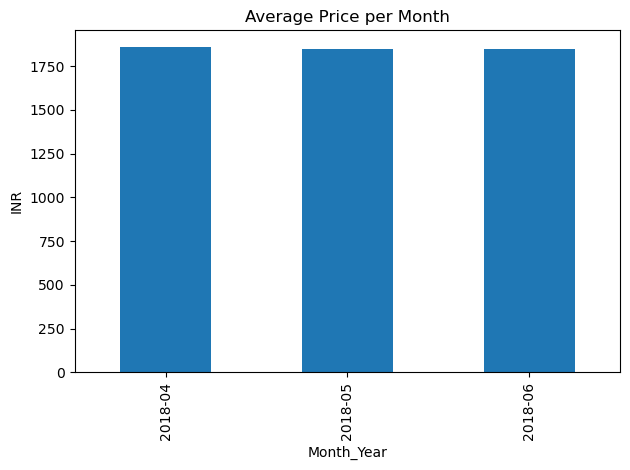

In [11]:
monthly_avg = df.groupby("Month_Year")["Price (INR)"].mean()
monthly_avg.plot(kind="bar", title="Average Price per Month", ylabel="INR")
plt.tight_layout()
plt.show()

# EDA - Price Trend Over Time

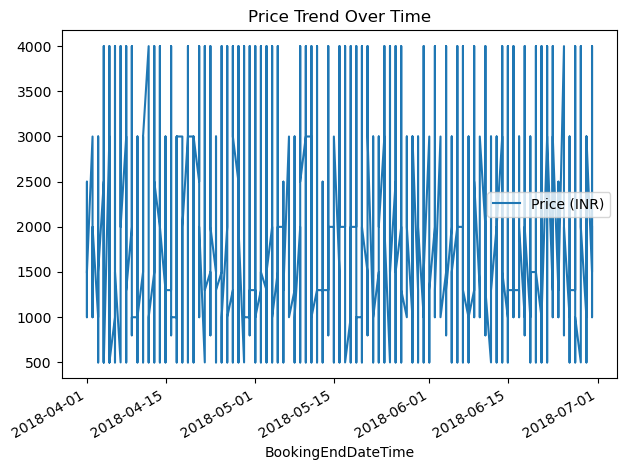

In [12]:
df_sorted = df.sort_values("BookingEndDateTime")
df_sorted.plot(x="BookingEndDateTime", y="Price (INR)", title="Price Trend Over Time")
plt.tight_layout()
plt.show()

# Histograms of price distribution

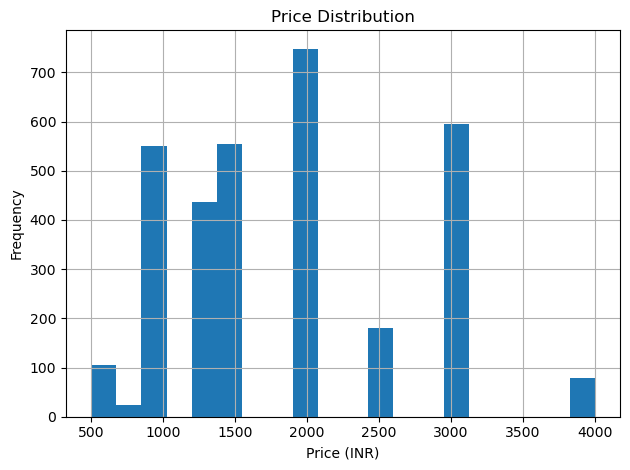

In [13]:
df["Price (INR)"].hist(bins=20)
plt.title("Price Distribution")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Boxplot for outlier detection

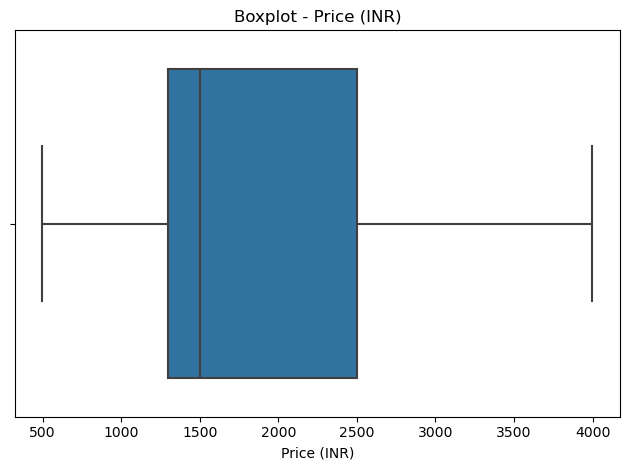

In [14]:
sns.boxplot(x=df["Price (INR)"])
plt.title("Boxplot - Price (INR)")
plt.tight_layout()
plt.show()

# Summary statistics

In [15]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
        MaxBookees  Number Booked  Price (INR)             BookingEndDateTime
count  3271.000000    3271.000000  3271.000000                           3271
mean     32.224396      17.125955  1852.714460  2018-05-16 11:00:47.324977152
min       2.000000       1.000000   499.000000            2018-04-01 00:00:00
25%      24.000000      10.000000  1299.000000            2018-04-24 00:00:00
50%      30.000000      16.000000  1499.000000            2018-05-16 00:00:00
75%      35.000000      24.000000  2499.000000            2018-06-08 00:00:00
max      70.000000      64.000000  3999.000000            2018-06-30 00:00:00
std      15.121398       9.515352   792.636673                            NaN


# Top Activity Descriptions

In [16]:
print("\nTop 10 Activity Descriptions:")
print(df["ActivityDescription"].value_counts().head(10))


Top 10 Activity Descriptions:
ActivityDescription
Body Conditioning 10-11am    39
Body Balance 11-12pm         35
Aquafit 7.00-8.00pm          35
Body Combat 7.00-8.00pm      33
Jnr Gym Appoint 4-5pm        31
Studio Cyc 5.00-5.50pm       26
20-20-20 9.30-10.30am        26
Yoga 10.30-11.30am           26
Studio Cyc 7.05-7.55am       26
Aquafit 7.15-8.15pm          26
Name: count, dtype: int64


# Top Sites

In [17]:
print("\nTop 5 Sites:")
print(df["ActivitySiteID"].value_counts().head(5))



Top 5 Sites:
ActivitySiteID
HXP    771
SBP    731
BRP    727
NBL    529
TSC    513
Name: count, dtype: int64


# Final Quality Summary Report

In [18]:
print("""
===== Quality Summary =====
- Missing prices removed: 18 rows dropped from df1.
- No duplicates found after merging.
- Date parsing successful; range: {} to {}
- Price range: {} to {} INR
- Dataset shape after cleaning: {}
===========================
""".format(
    df["BookingEndDateTime"].min().date(),
    df["BookingEndDateTime"].max().date(),
    df["Price (INR)"].min(),
    df["Price (INR)"].max(),
    df.shape
))


===== Quality Summary =====
- Missing prices removed: 18 rows dropped from df1.
- No duplicates found after merging.
- Date parsing successful; range: 2018-04-01 to 2018-06-30
- Price range: 499.0 to 3999.0 INR
- Dataset shape after cleaning: (3271, 8)



In [20]:
df.to_excel("Cleaned_Fitness_Classes_Data.xlsx", index=False)

In [19]:
median_price = df["Price (INR)"].median()
median_booked = df["Number Booked"].median()
median_capacity = df["MaxBookees"].median()

print("Median Price:", median_price)
print("Median Number Booked:", median_booked)
print("Median Max Capacity:", median_capacity)

Median Price: 1499.0
Median Number Booked: 16.0
Median Max Capacity: 30.0


# Parse booking date and time separately, then combine


In [27]:
df["BookingDate"] = pd.to_datetime(df["BookingEndDateTime"]).dt.date
df["BookingStartTime"] = pd.to_datetime(df["BookingStartTime"], format="%H:%M:%S").dt.time

# Combine date + time into full datetime


In [28]:
df["BookingStartDateTime"] = pd.to_datetime(
    df["BookingDate"].astype(str) + " " + df["BookingStartTime"].astype(str)
)

# Extract hour & day


In [29]:
df["hour"] = df["BookingStartDateTime"].dt.hour
df["day"] = df["BookingStartDateTime"].dt.day_name()

# Group


In [30]:
demand_by_day = df.groupby("day")["Number Booked"].mean()
demand_by_hour = df.groupby("hour")["Number Booked"].mean()

In [31]:
print("Average demand by day:\n", demand_by_day)
print("\nAverage demand by hour:\n", demand_by_hour)

Average demand by day:
 day
Friday       14.735354
Monday       17.166976
Saturday     17.917293
Sunday       18.965318
Thursday     16.253704
Tuesday      20.500861
Wednesday    15.859675
Name: Number Booked, dtype: float64

Average demand by hour:
 hour
6     12.521739
7     11.343750
8     19.480769
9     20.677316
10    18.781746
11    16.364829
12    12.671512
13    14.946154
14    11.274074
15     7.845238
16     8.834951
17    21.084175
18    20.299383
19    19.794393
20    18.992424
Name: Number Booked, dtype: float64


In [32]:
df["Utilization"] = df["Number Booked"] / df["MaxBookees"]

# Average utilization per class type
demand_by_class = (
    df.groupby("ActivityDescription")[["Number Booked","MaxBookees","Utilization"]]
      .mean()
      .sort_values("Utilization", ascending=False)
)

print(demand_by_class.head(10))

                        Number Booked  MaxBookees  Utilization
ActivityDescription                                           
Aquafit  7.00-8.00pm        28.083333   18.083333     2.908333
Body Combat 11-12pm         60.000000   60.000000     1.000000
Pilates 9.30-10.30am        23.269231   24.000000     0.969551
Zumba 6.15-7.15pm           24.153846   25.000000     0.966154
Step 6-7pm                  13.461538   14.000000     0.961538
Pilates 9.00-9.50am         24.000000   25.000000     0.960000
Aqua Fit 11.15-12.00        33.400000   35.000000     0.954286
Aquafit 6.00-7.00pm         33.230769   35.000000     0.949451
Aquafit  6.00-7.00pm        33.000000   35.000000     0.942857
Pilates   9.00-10.00am      23.538462   25.000000     0.941538


In [33]:
demand_by_class["ClassCount"] = df.groupby("ActivityDescription")["ActivitySiteID"].count()

# Keep only classes that ran at least 20 times
popular_classes = demand_by_class[demand_by_class["ClassCount"] >= 20]

print(popular_classes.sort_values("Utilization", ascending=False).head(10))

                         Number Booked  MaxBookees  Utilization  ClassCount
ActivityDescription                                                        
Pilates 9.30-10.30am         23.269231   24.000000     0.969551          26
Yoga 10.30-11.30am           22.461538   24.000000     0.935897          26
Aquafit 7.00-8.00pm          26.142857   29.857143     0.870612          35
Studio Cyc 5.20-6.10pm       23.217391   27.000000     0.859903          23
Body Combat 7.00-8.00pm      31.242424   36.515152     0.856602          33
Body Cond 7.30-8.30pm        21.136364   25.000000     0.845455          22
Swimfit 7pm - 8pm            11.571429   15.000000     0.771429          21
Studio Cyc 5.00-5.50pm       20.653846   27.000000     0.764957          26
Body Con 10.30-11.30am       23.500000   37.500000     0.626374          26
Pilates 1.45-2.45pm          29.200000   48.000000     0.600952          25


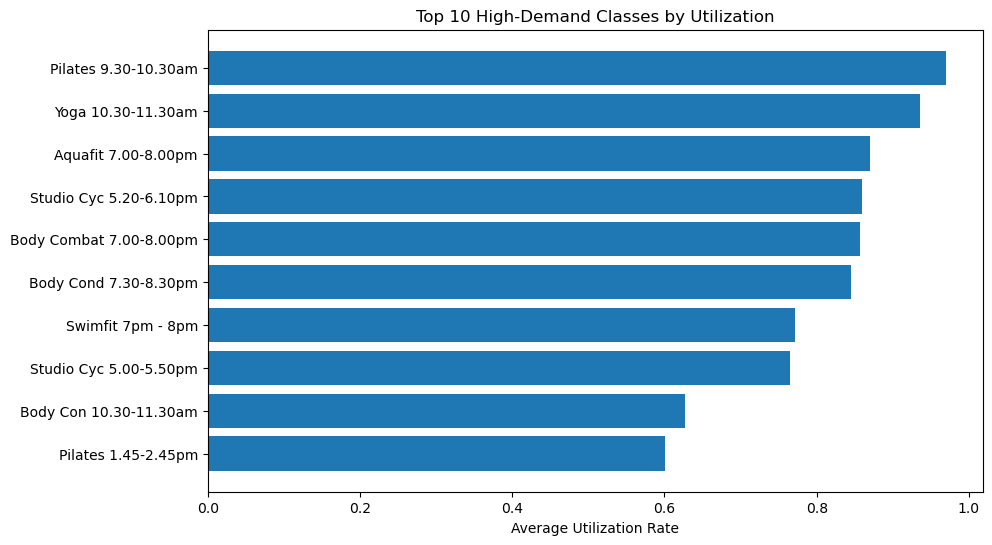

In [34]:
top_classes = popular_classes.sort_values("Utilization", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_classes.index, top_classes["Utilization"])
plt.xlabel("Average Utilization Rate")
plt.title("Top 10 High-Demand Classes by Utilization")
plt.gca().invert_yaxis()
plt.show()

In [37]:
# Utilization per class per site
df["Utilization"] = df["Number Booked"] / df["MaxBookees"]

demand_by_class_site = (
    df.groupby(["ActivitySiteID", "ActivityDescription"])
      .agg({"Number Booked": "mean", 
            "MaxBookees": "mean", 
            "Utilization": "mean"})
      .reset_index()
)

# Count how often each class happens per site
class_counts = (
    df.groupby(["ActivitySiteID", "ActivityDescription"])["ActivityDescription"]
      .count()
      .reset_index(name="ClassCount")
)

# Merge counts into main df
demand_by_class_site = demand_by_class_site.merge(
    class_counts, on=["ActivitySiteID", "ActivityDescription"]
)

# Filter: keep classes that occur at least 20 times
popular_classes_site = demand_by_class_site[demand_by_class_site["ClassCount"] >= 20]

# Sort by utilization (high-demand classes at each site)
top_classes_site = (
    popular_classes_site.sort_values(["ActivitySiteID","Utilization"], ascending=[True, False])
)

print(top_classes_site.head(20))

    ActivitySiteID        ActivityDescription  Number Booked  MaxBookees  \
108            HXP     Studio Cyc 5.20-6.10pm      23.217391   27.000000   
79             HXP      Body Cond 7.30-8.30pm      21.136364   25.000000   
124            HXP          Swimfit 7pm - 8pm      11.571429   15.000000   
106            HXP     Studio Cyc 5.00-5.50pm      20.653846   27.000000   
113            HXP     Studio Cyc 7.05-7.55am      15.115385   27.000000   
69             HXP      Aqua Fit 12.15 -13.15      13.916667   25.000000   
88             HXP      Jnr Gym Appoint 4-5pm       2.096774   10.000000   
212            SBP    Body Combat 7.00-8.00pm      30.739130   37.173913   
214            SBP     Body Con 10.30-11.30am      23.500000   37.500000   
202            SBP       Body Balance 11-12pm      12.771429   35.000000   
274            TSC       Pilates 9.30-10.30am      23.269231   24.000000   
282            TSC         Yoga 10.30-11.30am      22.461538   24.000000   
253         

In [42]:
df['BookingEndDateTime'] = pd.to_datetime(df['BookingEndDateTime'], dayfirst=True, errors='coerce')


In [43]:
df['Day'] = df['BookingEndDateTime'].dt.day_name()
df['Hour'] = df['BookingEndDateTime'].dt.hour
df['Month'] = df['BookingEndDateTime'].dt.month_name()

In [44]:
df_encoded = pd.get_dummies(
    df,
    columns=['Day','Hour','Month','ActivityDescription','ActivitySiteID'],
    drop_first=True
)

In [45]:
corr = df_encoded.corr(numeric_only=True)['Number Booked'].sort_values(ascending=False)
print("\nTop positive correlations with demand:\n", corr.head(15))
print("\nTop negative correlations with demand:\n", corr.tail(15))


Top positive correlations with demand:
 Number Booked                                   1.000000
Utilization                                     0.570116
MaxBookees                                      0.442555
ActivityDescription_Line Dance 10.45-11.45am    0.230015
Day_Tuesday                                     0.164860
ActivityDescription_Zumba Gold 12.45-1.45pm     0.152384
ActivitySiteID_NBL                              0.151276
ActivityDescription_Body Combat 7.00-8.00pm     0.149791
ActivityDescription_Body Pump  5.45-6.45pm      0.123272
ActivityDescription_Pilates 1.45-2.45pm         0.111376
ActivityDescription_Aquafit 6.00-7.00pm         0.106928
ActivityDescription_Aquafit  6.00-7.00pm        0.105396
ActivityDescription_Body Combat 9.15-10.15am    0.103353
ActivityDescription_Aquafit 7.00-8.00pm         0.098566
ActivityDescription_Aquafit 11am - 12           0.097735
Name: Number Booked, dtype: float64

Top negative correlations with demand:
 ActivityDescription_Gentle 